### Entendendo Variância e Covariância

### **Definições**
#### 1 - Covariância: Medida de associação linear entre duas variáveis. Mede como duas variáveis variam juntas.
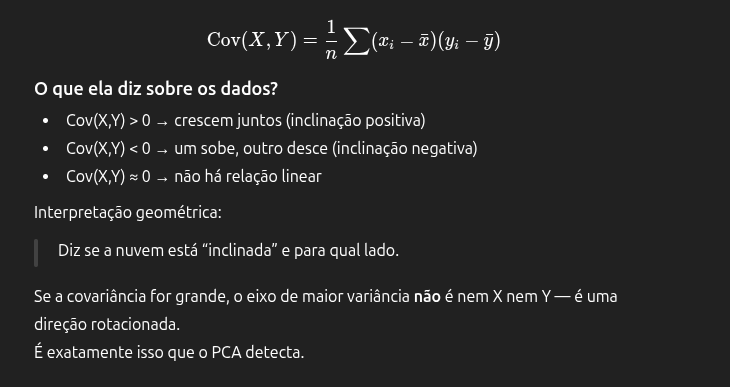

#### 2 - Variância: Mede a dispersão dos dados em relação a média.
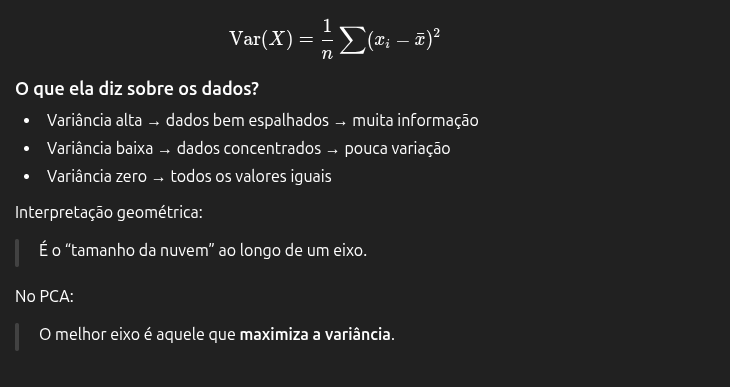

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

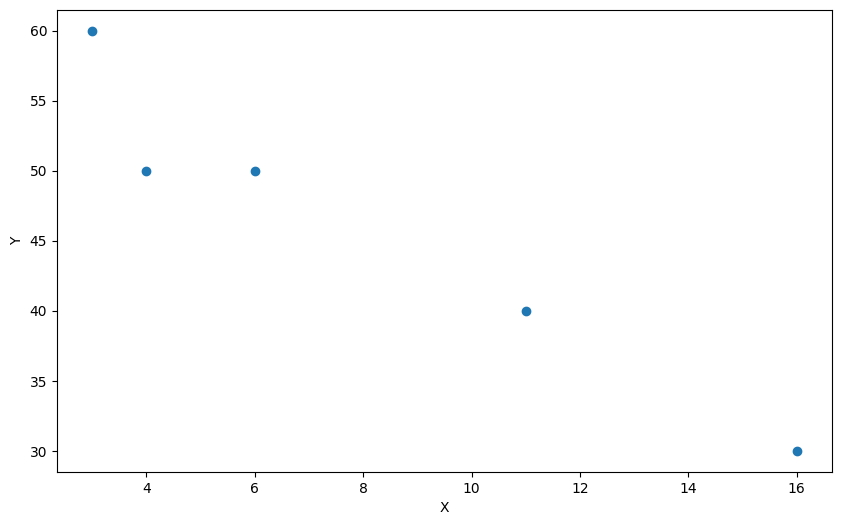

Covariância = -60.00


In [62]:
# Exemplo:

# Dados:

x = np.array([4,6,11,16,3])
y = np.array([50, 50, 40, 30, 60])

# Covariancia Amostral
n = len(x)
co_var = np.sum((x-np.mean(x))*(y - np.mean(y))) / (n-1)

plt.figure(figsize = (10,6))

plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

print(f"Covariância = {co_var:.2f}")

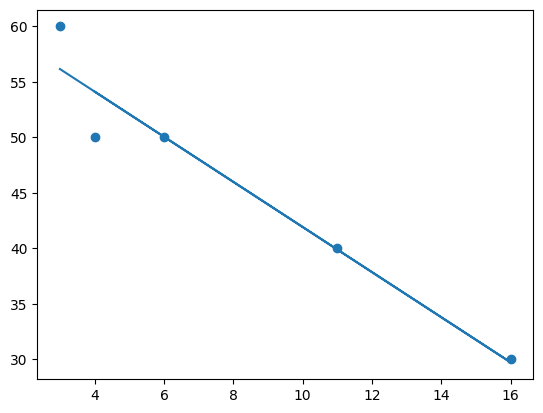

r2 score = 0.94


In [63]:
# Modelando os dados em uma reta

model = LinearRegression()

model.fit(x.reshape(-1,1), y)

f = lambda x: model.coef_ * x + model.intercept_

y_r = f(x)

plt.scatter(x, y)
plt.plot(x, y_r)

plt.show()

print(f"r2 score = {r2_score(y, y_r):.2f}")

In [19]:
# Transformações Lineares:

def T_projecao_x(v): # T(x,y) = (x,0)

    A = np.array([[1,0], [0,0]])

    w = A @ v

    return w
    

def T_projecao_y(v): # T(x,y) = (0,y)

    A = np.array([[0,0], [0,1]])

    w = A @ v

    return w
    

In [23]:
# Projeções: 

v = np.vstack((x, y))
print(f"Vetores Originais: \n {v}")

v_T_x = T_projecao_x(v)
print(f"Projeção em x: \n {v_T_x}")

v_T_y = T_projecao_y(v)
print(f"Projeção em y: \n {v_T_y}")

Vetores Originais: 
 [[ 4  6 11 16  3]
 [50 50 40 30 60]]
Projeção em x: 
 [[ 4  6 11 16  3]
 [ 0  0  0  0  0]]
Projeção em y: 
 [[ 0  0  0  0  0]
 [50 50 40 30 60]]


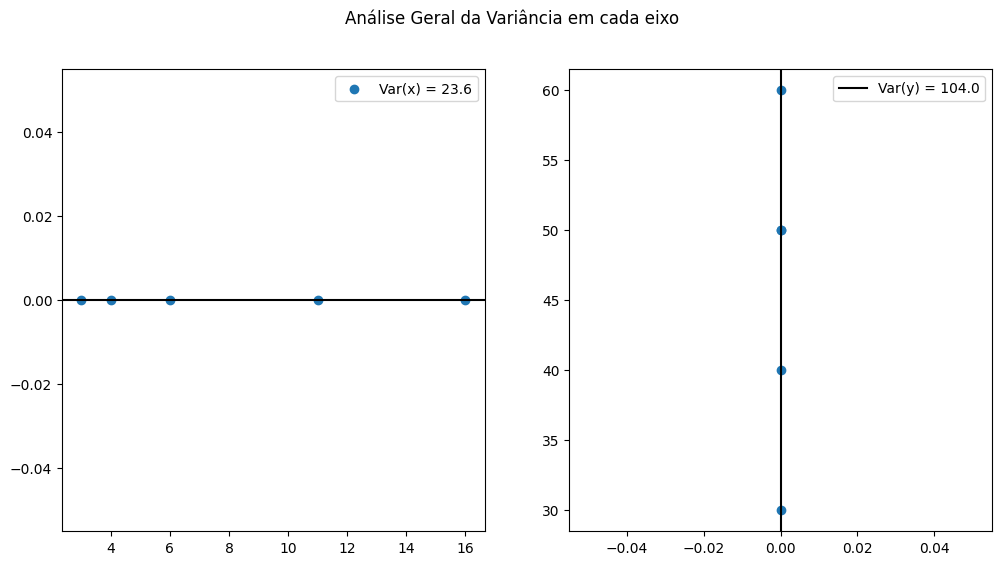

In [44]:
# Plotando as projeções:

fig, axs = plt.subplots(1, 2, figsize = (12,6))

fig.suptitle("Análise Geral da Variância em cada eixo")

var_x = np.var(v_T_x[0])
axs[0].scatter(v_T_x[0], v_T_x[1] , label = f'Var(x) = {var_x}')
axs[0].axhline(0, color = 'black')
axs[0].legend()

var_y = np.var(v_T_y[1])
axs[1].scatter(v_T_y[0], v_T_y[1] )
axs[1].axvline(0, color = 'black', label = f'Var(y) = {var_y}')
axs[1].legend()

plt.show()


In [ ]:
# Inferencias:

# -> O eixo Y carrega muito mais informação (variabilidade) que o eixo X.
# -> A maior parte da variância dos dados está alinhada com a direção do eixo Y.

### **Matriz de Covariância**

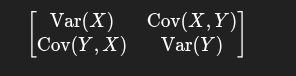

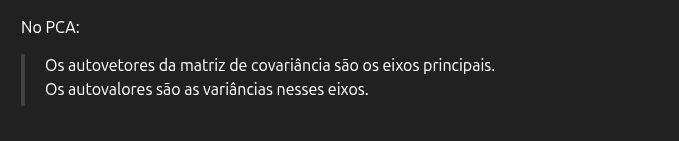

In [75]:
import numpy as np

np.random.seed(42)

n = 500

x = np.random.normal(0, 10, n)
y = 0.7 * x + np.random.normal(0, 5, n)

dados = np.column_stack((x, y))

print(dados[:10])

[[ 4.96714153  8.10788681]
 [-1.38264301  8.57923309]
 [ 6.47688538 -2.4590181 ]
 [15.23029856 13.47605518]
 [-2.34153375 -4.89228647]
 [-2.34136957 -4.07458562]
 [15.79212816  8.09252009]
 [ 7.67434729  1.05208926]
 [-4.69474386 -3.04371256]
 [ 5.42560044 -0.35683028]]


In [ ]:
var_x = np.var(x)
var_y = np.var(y)

print(f"Variância em x: {var_x:.2f}") # Dados mais dispersos, mais informações.
print(f"Variãncia em y: {var_y:.2f}")

Variância em x: 96.09
Variãncia em y: 65.88


In [78]:
matriz_cov = np.cov(x, y)

print("Matriz de covariância: ")
print(matriz_cov)

Matriz de covariância: 
[[96.28579355 63.76913487]
 [63.76913487 66.00871282]]


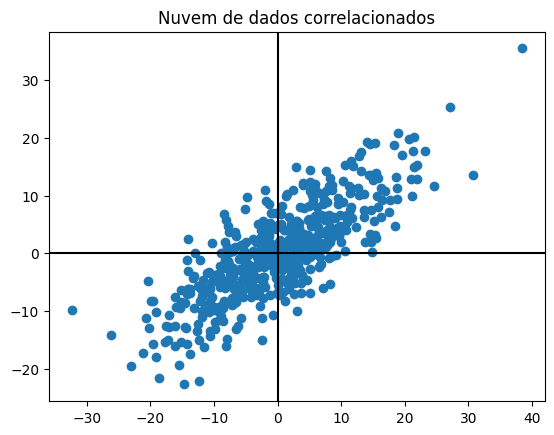

In [81]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.title("Nuvem de dados correlacionados")
plt.show()

In [85]:
# Calculando autovalores e autovetores:

autovalores, autovetores = np.linalg.eig(matriz_cov)

print(f"Autovalores: {autovalores}")

print("Autovetores: ")
print(autovetores)

#Os autovetores associados a autovalores distintos de uma matriz simétrica real são ortogonais entre si.

Autovalores: [146.68867494  15.60583143]
Autovetores: 
[[ 0.78453065 -0.62009004]
 [ 0.62009004  0.78453065]]


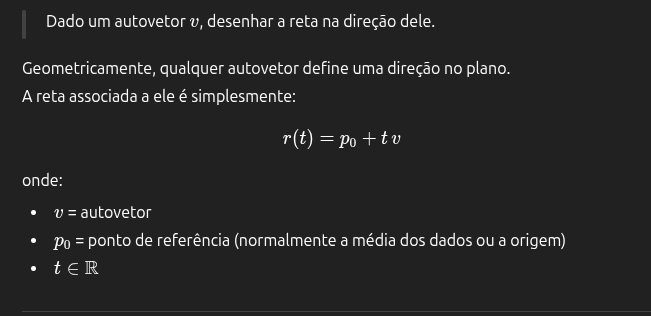